In [1]:
# Sentiment analysis using transformers 
# Embedding and nearest neigbour search 
# Named entity recognition
# TExt generation/
# Masked language modelling
# Text summarization
# language translation
# Question-answering[ input=(question,context), Answer = selection from context (usually the input is just one string but here it will be 2 strings)]
# Zero shot classification [example:- we can do spam detection without actually training the model to do spam detection]?

In [2]:
# Basics of sentiment analysis: -
# this sentiment analysis is based on hugging face transformers library.
# in case of sentiment analysis if we are using a pretrained models we will be stick with whatever the model was trained on and in this 
# case by using hugging face library we are stuck with binary classification
# Why we use transformers?
# Simple approaches will not be able to figure out the conetxt of the given sentences for example: -
# positive: - This movie was very interesting
# negative: - This movie was not very interesting. 
# So no apprach will be able to take in the context of the not word here, even if I am using textblob or lSTM or bag of waord approach for this sentence 
# another example: -
# positive: - This was a good movie
# negative: - I can't say that this was a good movie
# Sequnec models like RNn[neural networks with a tree structure] and CNN can be helpful in this case 

# List of all the possible tasks that can be done with the pipeline

sentiment-analysis

feature-extraction (convert text into a vector)

ner (named entity recognition)

text-generation

fill-mask (“article spinning”)

summarization

translation (e.g. translation_en_to_fr)

question-answering

zero-shot-classification

conversational (“chat bot”)

text2text-generation

# Non-text pipelines:

image-classification

image-segmentation

object-detection

audio-classification

In [3]:
from transformers import pipeline 
classifier = pipeline('sentiment-analysis')
# In this hugging face library only positive and negative tweets can be identified not the neutralk ones.
# Its 268 mb of data for sentiment analysis.

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [4]:
classifier('this movie was not very interesting') 
# we are getting the posterior probablity of the of the given text that it is negative with a 99% probablity 

[{'label': 'NEGATIVE', 'score': 0.9997949004173279}]

In [45]:
classifier('this movie was very interesting')

[{'label': 'POSITIVE', 'score': 0.9997106194496155}]

In [46]:
# Basically it is able to take in account of the context of the sentence that is given to us......

In [47]:
# This pipeline is pretty flexible we can pass in a series of texts 
classifier([
    'This was a good movie',
    "I can't say that this was a good movie" 
])

[{'label': 'POSITIVE', 'score': 0.9998570680618286},
 {'label': 'NEGATIVE', 'score': 0.9278451204299927}]

In [3]:
# Implemeting through code and on the given dataset to also know about the accuracy scores and 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score, confusion_matrix
# roc_auc score is preffered over other metrics when the data is imbalaced, basically means that the data has one class more than the other 
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv('AirlineTweets.csv')

In [50]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

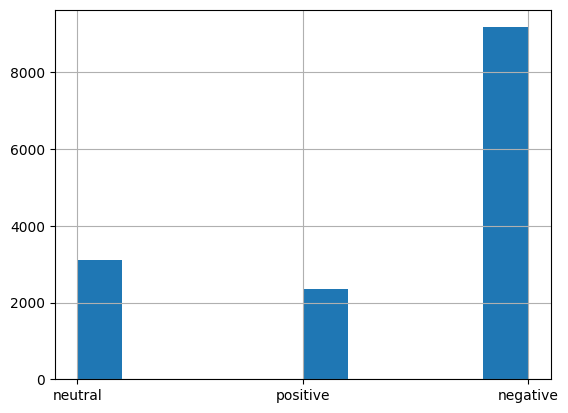

In [51]:
data['airline_sentiment'].hist()
# Here we can see the imbalace of classes that exist and as per the higging face library we can't have the 
# neutral class in our data.

In [52]:
data = data[data['airline_sentiment']!='neutral']

<Axes: >

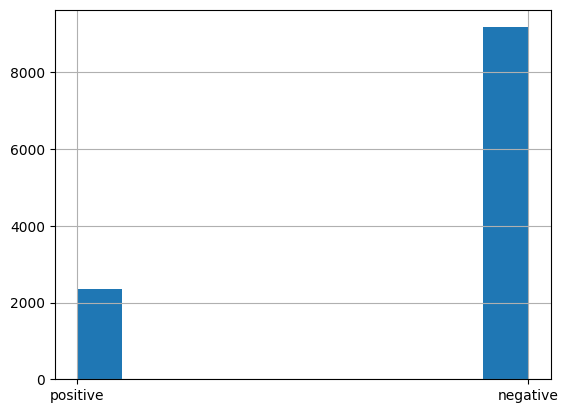

In [53]:
data['airline_sentiment'].hist() 

In [54]:
data['airline_sentiment']=pd.get_dummies(data['airline_sentiment'],drop_first=True,dtype=int,prefix=None)
# 1 for positive and 0 fro negative.

In [55]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [56]:
texts=data['text'].tolist() 

In [57]:
predictions=classifier(texts) 
# RUn it once as it takes time to complete its process

In [58]:
prob = [prediction['score'] if prediction['label'].startswith('P') else 1-prediction['score'] for prediction in predictions]

In [59]:
prob
# We here get the probability values for positive and negative classes, so if the class is positive we get like the complete probablity
# but if the class is negative we get 1- score for them 

[0.6070863604545593,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574825763702393,
 0.9553211331367493,
 0.9827088117599487,
 0.9994851350784302,
 0.9993509650230408,
 0.9940821528434753,
 0.9863133430480957,
 0.9996304512023926,
 0.001948714256286621,
 0.9964436888694763,
 0.0031333565711975098,
 0.9787647724151611,
 0.9995218515396118,
 0.004548370838165283,
 0.9995624423027039,
 0.9998748302459717,
 0.004880666732788086,
 0.0004048943519592285,
 0.0006322264671325684,
 0.01542818546295166,
 0.01828092336654663,
 0.0004482865333557129,
 0.0023748278617858887,
 0.9934479594230652,
 0.9976067543029785,
 0.8661718964576721,
 0.0003237724304199219,
 0.8415605425834656,
 0.0032317638397216797,
 0.9997846484184265,
 0.1761455535888672,
 0.9993895292282104,
 0.09156584739685059,
 0.004861712455749512,
 0.9997820258140564,
 0.0014235973358154297,
 0.004673957824707031,
 0.00464242696762085,
 0.019041001796722412,
 0.9911696910858154,
 0.01255035400390625,
 0.00809931755065918,
 0.99

In [60]:
preds= [ 1 if i['label'].startswith('P') else 0 for i in predictions]

In [61]:
preds= np.array(preds)

In [62]:
np.mean(preds == data['airline_sentiment']) 
# also given that its an imbalance dataset means that the accuracy is misleading
# this give us the accuracy for our predictions, and we get like 90% accuracy that is given to us by our untrained hgging face model

0.8898708950697514

In [63]:
confusion_matrix(data['airline_sentiment'],preds, normalize='true') 
# we get like good high values in our diangnoal columns which maps to true positive and true negative 

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

In [64]:
roc_auc_score(data['airline_sentiment'],prob) 
# roc auc score takes in the original data with the probablity of the other data predicted to get us the real accuracy in an 
# imabalce class.

0.9485935382287788

In [65]:
# TExt Generation using GPT2 model 
gen = pipeline('text-generation')# Getting the gpt 2 model 

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [31]:
from pprint import pprint
import string

In [67]:
text_data=pd.read_csv('robert_frost_collection.csv')

In [70]:
text_data.dropna(inplace=True)

In [75]:
text_data=text_data[['Name ','Content']]

In [98]:
content=[]
punct = string.punctuation +'\n'+'\r'+'—'
translator=str.maketrans('','',punct)
for i in text_data['Content']:
    content.append(i.translate(translator))

In [113]:
gen(content[0],max_length=180)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Whose woods these are I think I know   His house is in the village though   He will not see me stopping here   To watch his woods fill up with snow   My little horse must think it queer   To stop without a farmhouse near   Between the woods and frozen lake   The darkest evening of the year   He gives his harness bells a shake   To ask if there is some mistake   The only other sound’s the sweep   Of easy wind and downy flake   The woods are lovely dark and deep   But I have promises to keep   And miles to go before I sleep   And miles to go before I sleep   To see what is in the house and to know that my dreams are true   I will never be alone in my dreams, I promise   But I want'}]

In [105]:
content[0]

'Whose woods these are I think I know   His house is in the village though   He will not see me stopping here   To watch his woods fill up with snow   My little horse must think it queer   To stop without a farmhouse near   Between the woods and frozen lake   The darkest evening of the year   He gives his harness bells a shake   To ask if there is some mistake   The only other sound’s the sweep   Of easy wind and downy flake   The woods are lovely dark and deep   But I have promises to keep   And miles to go before I sleep   And miles to go before I sleep'

In [114]:
# the way to train this model is the same giving it the text and comparing it with the output it generates with the output we want
# it to generate

In [115]:
prompt = "Neural Network with attention have been used with great success in natural language processing"
gen(prompt,max_length=300)
# it is only useful as if given a prompt it can generate some text, tasks like next word prediction be useful for this.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Neural Network with attention have been used with great success in natural language processing [38]. Some such models are described here and have been presented as being a general version of the concept of an 'empathic memory', or 'cognitive control mechanism', proposed with some support among research on the neural correlates of cognitive control. However, in this paper, the general framework of a neural network model should be considered in the context of the work being done with attention control in a task-dependent, high-level context. Instead, we will examine the neurophysiological basis of attention control.\n\nTo date, attention control has been successfully used as a conceptual framework for neural networks. The primary aim of the present study was to investigate how the control of the attentional system operates in a novel and novel way through a novel task (Wierzwolle et al., 2000). To test this, we utilized the attentional network model in an exploratory

In [1]:
# Masked Language Modelling. basically quilbot 

In [17]:
gen = pipeline('fill-mask')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [18]:
gen('My name is Karandeep Singh and I will work in <mask>') # using this we can find the masked words in a sentence.

[{'score': 0.08802706003189087,
  'token': 3779,
  'token_str': ' IT',
  'sequence': 'My name is Karandeep Singh and I will work in IT'},
 {'score': 0.07716872543096542,
  'token': 3534,
  'token_str': ' Delhi',
  'sequence': 'My name is Karandeep Singh and I will work in Delhi'},
 {'score': 0.06397182494401932,
  'token': 5729,
  'token_str': ' Mumbai',
  'sequence': 'My name is Karandeep Singh and I will work in Mumbai'},
 {'score': 0.04309282451868057,
  'token': 666,
  'token_str': ' India',
  'sequence': 'My name is Karandeep Singh and I will work in India'},
 {'score': 0.02755085937678814,
  'token': 17494,
  'token_str': ' Chennai',
  'sequence': 'My name is Karandeep Singh and I will work in Chennai'}]

In [19]:
# Named entity Recognistion.
# when we have the outputs we have to know that the I stands for inside and ) for outside and B for begining.
gen = pipeline('ner',aggregation_strategy='simple')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [15]:
# Like Nltk.sent_tokenize we have another function that joins the tokens together with knowledge of when the sentence is ending and when we need
# a space or appropriate punctuations, that 's why we don't use ''.join() method. becasue the .join won't know that when there is 
# a period there is a space after but not before that.
# from nltk.tokenize.treebank import TreebankWordDetokenizer
# detokenizer = TreebankWordDetokenizer()
# detokenizer.detokenize(inputs) to get the sentences.

In [20]:
gen('My name is Karandeep Singh and I work in Delhi')

[{'entity_group': 'PER',
  'score': 0.9992292,
  'word': 'Karandeep Singh',
  'start': 11,
  'end': 26},
 {'entity_group': 'LOC',
  'score': 0.9991479,
  'word': 'Delhi',
  'start': 41,
  'end': 46}]

In [21]:
# Text Summarization

In [23]:
gen=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [25]:
gen("Chocolate is a food made from roasted and ground cacao seed kernels that is available as a liquid, solid, or paste, either on its own or as a flavoring agent in other foods. Cacao has been consumed in some form since at least the Olmec civilization (19th-11th century BCE),[1][2] and the majority of Mesoamerican people ─ including the Maya and Aztecs ─ made chocolate beverages.[3]The seeds of the cacao tree have an intense bitter taste and must be fermented to develop the flavor. After fermentation, the seeds are dried, cleaned, and roasted. The shell is removed to produce cocoa nibs, which are then ground to cocoa mass, unadulterated chocolate in rough form. Once the cocoa mass is liquefied by heating, it is called chocolate liquor. The liquor may also be cooled and processed into its two components: cocoa solids and cocoa butter. Baking chocolate, also called bitter chocolate, contains cocoa solids and cocoa butter in varying proportions, without any added sugar. Powdered baking cocoa, which contains more fiber than cocoa butter, can be processed with alkali to produce dutch cocoa. Much of the chocolate consumed today is in the form of sweet chocolate, a combination of cocoa solids, cocoa butter or added vegetable oils, and sugar. Milk chocolate is sweet chocolate that additionally contains milk powder or condensed milk. White chocolate contains cocoa butter, sugar, and milk, but no cocoa solids.Chocolate is one of the most popular food types and flavors in the world, and many foodstuffs involving chocolate exist, particularly desserts, including cakes, pudding, mousse, chocolate brownies, and chocolate chip cookies. Many candies are filled with or coated with sweetened chocolate. Chocolate bars, either made of solid chocolate or other ingredients coated in chocolate, are eaten as snacks. Gifts of chocolate molded into different shapes (such as eggs, hearts, coins) are traditional on certain Western holidays, including Christmas, Easter, Valentine's Day, and Hanukkah. Chocolate is also used in cold and hot beverages, such as chocolate milk and hot chocolate, and in some alcoholic drinks, such as creme de cacao.Although cocoa originated in the Americas, West African countries, particularly Côte d'Ivoire and Ghana, are the leading producers of cocoa in the 21st century, accounting for some 60% of the world cocoa supply.With some two million children involved in the farming of cocoa in West Africa, child slavery and trafficking associated with the cocoa trade remain major concerns.[4][5] A 2018 report argued that international attempts to improve conditions for children were doomed to failure because of persistent poverty, absence of schools, increasing world cocoa demand, more intensive farming of cocoa, and continued exploitation of child labor")

[{'summary_text': " Chocolate is a food made from roasted and ground cacao seed kernels that is available as a liquid, solid, or paste . Cacao has been consumed in some form since at least the Olmec civilization (19th-11th century BCE) The seeds of the cacao tree have an intense bitter taste and must be fermented to develop the flavor . West African countries, particularly Côte d'Ivoire and Ghana, are leading producers of cocoa in the 21st century ."}]

In [35]:
# Neural MAchine Translation, is basically language translation from one language to another language.
# We use the metric to evelauate this task and that metric is known as BLEU score(Bilingual Evaluation Understudy).
# It uses 3 metrics to compare the outputs with the true values: -
# Prediction is compared with multiple reference texts, it is between 0 and 1 and looks at precison of n-grams
# translator = pipeline('translation', model="Helsinki-NLP/opus-mt-en-es")
# for some reason I was having error in this 

In [36]:
# translator("I like to eat pizza with ")

In [37]:
# Function from Nltk that computes the bleu score
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# sentence_bleu([tokens],tokens), we send the first argument as list because therecan be many translations for the obtained sentence and 
# tokens is basically the output from the model.
# we can remove the pucnctuations from the tokens using RegexpTokenizer
# tokenizer = RegexpTokenizer(r,'\w+') # to keep all the words

In [5]:
# we can use the question-answering model to answer the questions based of the given model.
gen=pipeline('question-answering')

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\karan\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\karan\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [7]:
gen(context='I went to the store to buy milk',question="what did I buy?")

{'score': 0.995006263256073, 'start': 27, 'end': 31, 'answer': 'milk'}

In [ ]:
# Zero Shot Classification, It basically means that given a text can we classify as to which class it belongs to.
# We hav eto supply both the input texts and the labels that we want it to classify our content into.
# I am not doing this here as It requires a lot of memory and GPu